# Figure S8: Multi-session training and rapid decoding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import joblib as jl

## Figure S8 a-c

In [2]:
# TODO (steffen)

In [3]:
data=pd.read_hdf('../data/FigureS8d.h5')

In [4]:
def one_rat(ax, rat_no, rat_df):
    adapt_reinit = [True, False]
    adapt_tune_all = [True, False]
    
    for reinit in adapt_reinit:
        for tune_all in adapt_tune_all:
            if reinit:
                c = 'gray'
            else:
                c = 'purple'#(0, (5, 10))
            if tune_all:
                ls = 'solid'
            else:
                ls = 'dashed'
            exp_type=rat_df[(rat_df['adapt_reinit']==reinit)&(rat_df['adapt_tune_all']==tune_all)]
            ax.plot(np.arange(int(steps/25)) , np.array(eval(exp_type['median_err'].item()))[:int(steps/25)]*100, linestyle = ls, color = c, lw=3)
            ax.set_title(f'Rat {rat_no+1}', fontsize = 20)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            ax.set_ylabel('Median Error (cm)', fontsize= 30)
            ax.set_xlabel('Adaptation steps', fontsize=30)
            ax.set_xticks(xticks/25)
            ax.set_yticks(yticks)
            ax.set_yticklabels(yticks, fontsize=25)
            ax.set_xticklabels(xticks,fontsize=25)
            
def plot(rat_df):
    
    fig = plt.figure(figsize=(7,7))
    plt.subplots_adjust(wspace=0.5, hspace = 0.5)
    ax = plt.subplot(111)
    rat = 3
    plt.yticks(fontsize=25)

    one_rat(ax,rat, rat_df)

    custom_lines = [Line2D([0], [0], color='gray', lw=4),
                    Line2D([0], [0], color='purple', lw=4),
                    Line2D([0], [0], color='black', lw=4, ls = 'solid'),
                    Line2D([0,2], [0,0], color='black', lw=4, ls = 'dashed')
                   ]

    ax.legend(custom_lines, ['From scratch', 'Pre-trained','Full model', 'Input embedding', ], loc=(1.2,0), frameon = False, 
              fontsize=30)

## Figure S8d

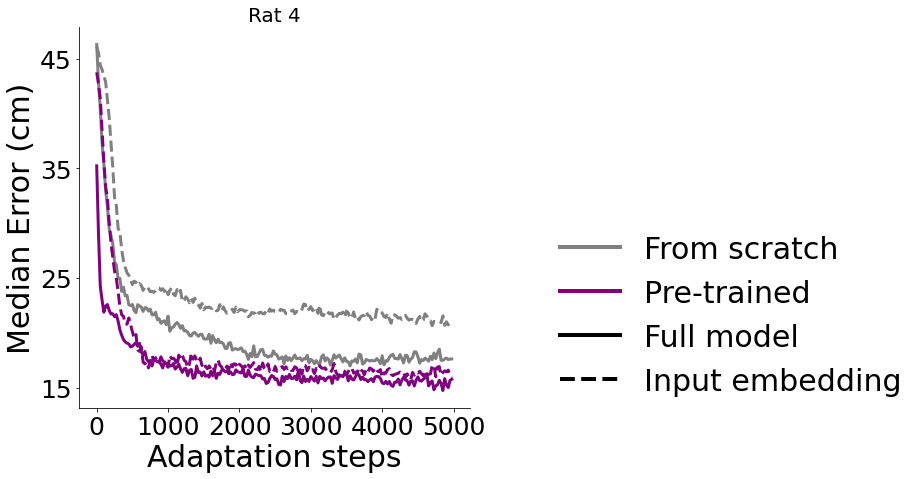

In [5]:
steps = 5000
yticks = np.arange(15, 55, 10)
xticks = np.arange(0, 6000, 1000)
plot(data)

### Figure S8d, inset

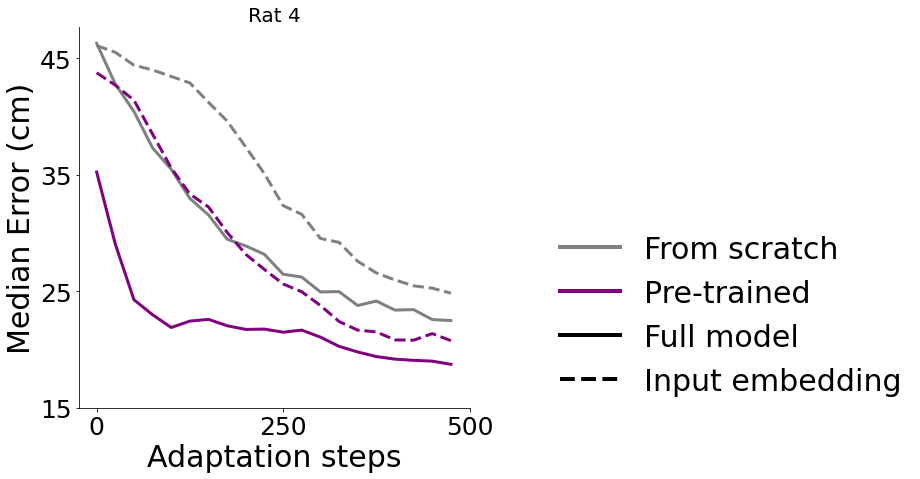

In [6]:
steps = 500
yticks = np.arange(15, 55, 10)
xticks = np.arange(0, steps+25, 25*10)
plot(data)